# Mortality Data Analysis 
Exploring trends in mortality rates across years and age groups using pandas, NumPy, and matplotlib. 

In [13]:
!pip install pandas numpy matplotlib



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make plots display nicely
plt.style.use('default')

# Load dataset
df = pd.read_csv("mortality.csv")

# Display first five rows
df.head()


,Year,Age Group,Deaths_per_100K,Population,Deaths
0,1900,1-4 Years,307.450712,199585,613
1,1900,5-9 Years,89.715328,204569,183
2,1900,10-14 Years,76.487699,199297,152
3,1900,15-19 Years,143.688192,202302,290
4,1900,20-29 Years,112.957884,201627,227


In [15]:
# Column names
print("Columns:")
print(df.columns)

# Data types
print("\nData Types:")
print(df.dtypes)

# Unique age groups
print("\nNumber of unique age groups:", df["Age Group"].nunique())

# Year range
print("Year range:", df["Year"].min(), "-", df["Year"].max())


Columns:
Index(['Year', 'Age Group', 'Deaths_per_100K', 'Population', 'Deaths'], dtype='str')

Data Types:
Year                 int64
Age Group              str
Deaths_per_100K    float64
Population             str
Deaths               int64
dtype: object

Number of unique age groups: 9
Year range: 1900 - 1950


In [16]:
# Remove commas from Population and convert to integer
df["Population"] = (
    df["Population"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(int)
)

# Convert Deaths_per_100K to numeric (float)
df["Deaths_per_100K"] = pd.to_numeric(df["Deaths_per_100K"], errors="coerce")

# Confirm types
print(df.dtypes)


Year                 int64
Age Group              str
Deaths_per_100K    float64
Population           int64
Deaths               int64
dtype: object


In [17]:
# Age group filters
print("1-4 Years:")
display(df[df["Age Group"] == "1-4 Years"].head())

print("50-59 Years:")
display(df[df["Age Group"] == "50-59 Years"].head())

# Years 1910–1920
filtered = df[(df["Year"] >= 1910) & (df["Year"] <= 1920)]
display(filtered)

# Only 1918
display(filtered[filtered["Year"] == 1918])


1-4 Years:


,Year,Age Group,Deaths_per_100K,Population,Deaths
0,1900,1-4 Years,307.450712,199585,613
9,1901,1-4 Years,285.879639,196363,561
18,1902,1-4 Years,302.132954,195320,590
27,1903,1-4 Years,313.964993,204593,642
36,1904,1-4 Years,297.462609,207093,616


50-59 Years:


,Year,Age Group,Deaths_per_100K,Population,Deaths
7,1900,50-59 Years,374.126233,198313,741
16,1901,50-59 Years,399.297542,197426,788
25,1902,50-59 Years,145.700000,200044,807
34,1903,50-59 Years,403.924540,199864,807
43,1904,50-59 Years,411.731032,203386,837


,Year,Age Group,Deaths_per_100K,Population,Deaths
90,1910,1-4 Years,304.385010,203428,619
91,1910,5-9 Years,58.936613,207447,122
92,1910,10-14 Years,71.648058,208142,149
93,1910,15-19 Years,122.098564,205781,251
94,1910,20-29 Years,102.298094,201455,206
...,...,...,...,...,...
184,1920,20-29 Years,111.465141,209680,233
185,1920,30-39 Years,190.367653,213493,406
186,1920,40-49 Years,211.767154,214877,455
187,1920,50-59 Years,422.297737,209697,885


,Year,Age Group,Deaths_per_100K,Population,Deaths
162,1918,1-4 Years,275.909739,207157,571
163,1918,5-9 Years,88.371663,213174,188
164,1918,10-14 Years,80.361797,212685,170
165,1918,15-19 Years,110.816298,208108,230
166,1918,20-29 Years,112.137068,208768,234
167,1918,30-39 Years,205.626796,210358,432
168,1918,40-49 Years,178.617542,209835,374
169,1918,50-59 Years,397.193972,209108,830
170,1918,60-69 Years,378.666694,211531,800


In [18]:
# Top 10 highest death rates
top10 = df.sort_values("Deaths_per_100K", ascending=False).head(10)
display(top10)

# Median death rate
median_rate = df["Deaths_per_100K"].median()
print("Median death rate:", median_rate)

# Average by year
avg_by_year = df.groupby("Year")["Deaths_per_100K"].mean()
display(avg_by_year.head())

# Average by age group
avg_by_age = df.groupby("Age Group")["Deaths_per_100K"].mean()
display(avg_by_age)


,Year,Age Group,Deaths_per_100K,Population,Deaths
53,1905,60-69 Years,425.792789,203523,866
142,1915,50-59 Years,424.495501,203143,862
187,1920,50-59 Years,422.297737,209697,885
124,1913,50-59 Years,419.981814,209014,877
61,1906,50-59 Years,418.041915,199394,833
133,1914,50-59 Years,417.486170,204109,852
440,1948,60-69 Years,413.903986,227207,940
17,1901,60-69 Years,411.838174,196937,811
43,1904,50-59 Years,411.731032,203386,837
106,1911,50-59 Years,408.810026,208554,852


Median death rate: 176.02377992977463


Year
1900    209.545750
1901    208.171909
1902    177.351719
1903    210.279584
1904    206.375456
Name: Deaths_per_100K, dtype: float64

Age Group
1-4 Years      289.701232
10-14 Years     66.105592
15-19 Years    109.807750
20-29 Years    106.575786
30-39 Years    187.595445
40-49 Years    188.656306
5-9 Years       63.501306
50-59 Years    384.630300
60-69 Years    386.568228
Name: Deaths_per_100K, dtype: float64

In [19]:
def get_agegroup_stats(age_group):
    subset = df[df["Age Group"] == age_group]["Deaths_per_100K"]
    return {
        "mean": subset.mean(),
        "median": subset.median(),
        "max": subset.max()
    }

print("Stats for 1-4 Years:", get_agegroup_stats("1-4 Years"))
print("Stats for 50-59 Years:", get_agegroup_stats("50-59 Years"))


Stats for 1-4 Years: {'mean': np.float64(289.70123174750455), 'median': np.float64(287.1995293947973), 'max': np.float64(325.6591613398799)}
Stats for 50-59 Years: {'mean': np.float64(384.63030033592), 'median': np.float64(389.6162790318321), 'max': np.float64(424.495500619844)}


In [20]:
rates = df["Deaths_per_100K"].to_numpy()

print("NumPy mean:", np.mean(rates))
print("NumPy std dev:", np.std(rates))
print("NumPy max:", np.max(rates))


NumPy mean: 198.12688279432467
NumPy std dev: 122.03391329972295
NumPy max: 425.792788518158


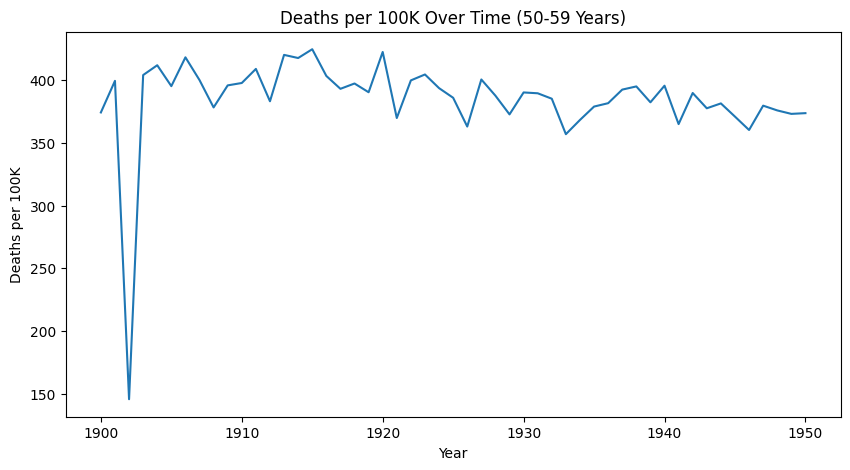

In [21]:
age_50 = df[df["Age Group"] == "50-59 Years"]

plt.figure(figsize=(10,5))
plt.plot(age_50["Year"], age_50["Deaths_per_100K"])
plt.xlabel("Year")
plt.ylabel("Deaths per 100K")
plt.title("Deaths per 100K Over Time (50-59 Years)")
plt.show()


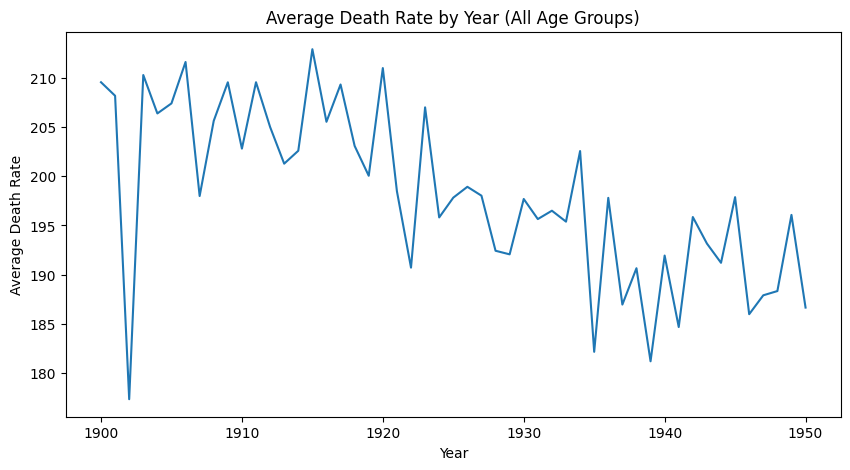

In [22]:
plt.figure(figsize=(10,5))
plt.plot(avg_by_year.index, avg_by_year.values)
plt.xlabel("Year")
plt.ylabel("Average Death Rate")
plt.title("Average Death Rate by Year (All Age Groups)")
plt.show()


## Reflection


Death rates appear to spike during certain historical periods, especially around major events such as pandemics or wars. The year 1918 shows a noticeable increase in mortality rates, likely due to the influenza pandemic. Younger and older age groups tend to show higher death rates compared to middle-aged groups. Cleaning the formatting issues in the dataset was important because numeric calculations anad plots would not work correctly if values remained as stings. Overall, the data shows long-term declines in mortality with occasional sharp increasese during crisis years. 